# Assignmnet 4 - part 4

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
import sklearn
import random

sns.set()

In [3]:
df = pd.read_csv('airquality.csv',usecols = ['Ozone','Solar.R','Wind','Temp'])
df.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56


In [4]:
df_airquality_part4 = df.copy()
df_airquality_part4 = df_airquality_part4.dropna()
df_airquality_part4.shape

(111, 4)

In [32]:
df_airquality_part4['TWcp'] = np.round(df_airquality_part4['Temp']* df_airquality_part4['Wind'],2)
df_airquality_part4['TWrat'] = np.round(df_airquality_part4['Temp']/ df_airquality_part4['Wind'],2)
df_airquality_part4.head()


,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,Temp_Wind_TWcp,Temp_Wind_TWrat,wind_min,wind_max,Temp_min_Wind_TWcp,Temp_max_Wind_TWcp,interaction_formula
0,41.0,190.0,7.4,67,495.8,9.05,570.2,83.45,2.3,20.7,154.1,1386.9,55539.96
1,36.0,118.0,8.0,72,576.0,9.00,656.0,89.00,2.3,20.7,165.6,1490.4,29386.00
2,12.0,149.0,12.6,74,932.4,5.87,1019.0,92.47,2.3,20.7,170.2,1531.8,41907.16
3,18.0,313.0,11.5,62,713.0,5.39,786.5,78.89,2.3,20.7,142.6,1283.4,126050.25
6,23.0,299.0,8.6,65,559.0,7.56,632.6,81.16,2.3,20.7,149.5,1345.5,116637.96


## Assignment 4 - Part 4 - excercise 1

In [6]:
print ('The summary report of TWcp is :\n\n' , df_airquality_part4[['TWcp']].describe())
print ('\n\nThe summary report of TWrat is\n\n :' , df_airquality_part4[['TWrat']].describe())


The summary report of TWcp is :

               TWcp
count   111.000000
mean    756.527027
std     246.263629
min     216.200000
25%     591.950000
50%     739.600000
75%     888.350000
max    1490.400000


The summary report of TWrat is

 :             TWrat
count  111.000000
mean     9.418649
std      5.614314
min      3.030000
25%      5.910000
50%      7.570000
75%     11.150000
max     40.870000


 ## Assignment 4 - Part 4 - excercise 2
 **Create two new models : Model 1: Temp + Wind + TWcp.**
 
 **Model 2: Temp + Wind + TWrat**

In [7]:
df_airquality_part4['Temp_Wind_TWcp'] = df_airquality_part4['Temp']+ df_airquality_part4['Wind']+\
df_airquality_part4['TWcp']

df_airquality_part4['Temp_Wind_TWrat'] = df_airquality_part4['Temp']+ df_airquality_part4['Wind']+\
df_airquality_part4['TWrat']
df_airquality_part4.head()
df_airquality_part4.shape

(111, 8)

In [8]:
y = df_airquality_part4 [['Ozone']]
Temp_Wind_TWcp_df = df_airquality_part4 [['Temp_Wind_TWcp']]
Temp_Wind_TWrat_df = df_airquality_part4 [['Temp_Wind_TWrat']]

**Ozon Regression by Temp_Wind_TWcp Regression and Ozon Regression by Temp_Wind_TWcp Regression**

In [9]:
x1 = sm.add_constant(Temp_Wind_TWcp_df)    
results_Temp_Wind_TWcp = sm.OLS(y,x1).fit()

x2 = sm.add_constant(Temp_Wind_TWrat_df)    
results_Temp_Wind_TWrat = sm.OLS(y,x2).fit()

print(results_Temp_Wind_TWcp.summary())




                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     24.71
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.49e-06
Time:                        17:23:36   Log-Likelihood:                -534.69
No. Observations:                 111   AIC:                             1073.
Df Residuals:                     109   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             90.7850     10.204      8.

C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


 **Ozon Regression by Temp_Wind_TWcp Regression**

In [10]:
print(results_Temp_Wind_TWrat.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.94e-20
Time:                        17:23:36   Log-Likelihood:                -502.14
No. Observations:                 111   AIC:                             1008.
Df Residuals:                     109   BIC:                             1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -164.3758     18.138     

### Assignment 4 - Part 4 - excercise 2
**a) Report t-test Result**

In [11]:
print('p_value of const in Ozon Regression by Temp_Wind_TWcp Regression is: 0.00 \n' )
print('p_value of Temp_Wind_TWcp in Ozon Regression by Temp_Wind_TWcp Regression is: 0.00\n ',100*'-' )
print('p_value of const in Ozon Regression by Temp_Wind_TWrat Regression is: 0.00 \n' )
print('p_value of Temp_Wind_TWrat in Ozon Regression by Temp_Wind_TWrat Regression is: 0.00 ' )


p_value of const in Ozon Regression by Temp_Wind_TWcp Regression is: 0.00 

p_value of Temp_Wind_TWcp in Ozon Regression by Temp_Wind_TWcp Regression is: 0.00
  ----------------------------------------------------------------------------------------------------
p_value of const in Ozon Regression by Temp_Wind_TWrat Regression is: 0.00 

p_value of Temp_Wind_TWrat in Ozon Regression by Temp_Wind_TWrat Regression is: 0.00 


### Assignment 4 - Part 4 - excercise 2
**b)According to the  p_valuse based on the t_test results there is no difference between variables**


In [12]:
df_airquality_part4.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,Temp_Wind_TWcp,Temp_Wind_TWrat
0,41.0,190.0,7.4,67,495.8,9.05,570.2,83.45
1,36.0,118.0,8.0,72,576.0,9.00,656.0,89.00
2,12.0,149.0,12.6,74,932.4,5.87,1019.0,92.47
3,18.0,313.0,11.5,62,713.0,5.39,786.5,78.89
6,23.0,299.0,8.6,65,559.0,7.56,632.6,81.16


### Assignment 4 - Part 4 - excercise 2
**C) Customize the dataframe for cross produt term of question**

In [13]:
df_airquality_part4['wind_min'] = df_airquality_part4['Wind'].min()
df_airquality_part4['wind_max'] = df_airquality_part4['Wind'].max()

df_airquality_part4['Temp_min_Wind_TWcp'] = df_airquality_part4['Temp']*df_airquality_part4['wind_min']
df_airquality_part4['Temp_max_Wind_TWcp'] = df_airquality_part4['Temp']*df_airquality_part4['wind_max']
df_airquality_part4.head()


,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,Temp_Wind_TWcp,Temp_Wind_TWrat,wind_min,wind_max,Temp_min_Wind_TWcp,Temp_max_Wind_TWcp
0,41.0,190.0,7.4,67,495.8,9.05,570.2,83.45,2.3,20.7,154.1,1386.9
1,36.0,118.0,8.0,72,576.0,9.00,656.0,89.00,2.3,20.7,165.6,1490.4
2,12.0,149.0,12.6,74,932.4,5.87,1019.0,92.47,2.3,20.7,170.2,1531.8
3,18.0,313.0,11.5,62,713.0,5.39,786.5,78.89,2.3,20.7,142.6,1283.4
6,23.0,299.0,8.6,65,559.0,7.56,632.6,81.16,2.3,20.7,149.5,1345.5


In [14]:
y = df_airquality_part4 [['Ozone']]

temp_wind_min = df_airquality_part4 [['Temp','Temp_min_Wind_TWcp']]

#print(y.shape,"\n\n",x1.shape)

x = sm.add_constant(temp_wind_min)    
results = sm.OLS(y,x).fit()
results.summary()


C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.55e-17
Time:                        17:23:37   Log-Likelihood:                -508.89
No. Observations:                 111   AIC:                             1022.
Df Residuals:                     109   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -147.6461     18.755     -7.872      0.000    -184.818    -110.474
Temp                   0.3878      0.038     10.192      0.000       0.312       0.463
Temp_min_Wind_TWcp     0.8919      0.088     10.192      0.000       0.718       1.065
==============================================================================
Omnibus:                       51.915   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.588
Skew:                           1.634   Prob(JB):                     6.11e-40
Kurtosis:                       8.326   Cond. No.                     2.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.84e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
y = df_airquality_part4 [['Ozone']]

temp_wind_max = df_airquality_part4 [['Temp','Temp_max_Wind_TWcp']]


x = sm.add_constant(temp_wind_max)    
results = sm.OLS(y,x).fit()
results.summary()


C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.55e-17
Time:                        17:23:37   Log-Likelihood:                -508.89
No. Observations:                 111   AIC:                             1022.
Df Residuals:                     109   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -147.6461     18.755     -7.872      0.000    -184.818    -110.474
Temp                   0.0057      0.001     10.192      0.000       0.005       0.007
Temp_max_Wind_TWcp     0.1176      0.012     10.192      0.000       0.095       0.140
==============================================================================
Omnibus:                       51.915   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.588
Skew:                           1.634   Prob(JB):                     6.11e-40
Kurtosis:                       8.326   Cond. No.                     1.33e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Assignment 4 - Part 4 - excercise 2 - Answer

**c)When wind is at its minimum the slope of temp is: .38**


**c)When wind is at its maximum the slope of temp is: .00**

In [16]:
df_airquality_part4.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,Temp_Wind_TWcp,Temp_Wind_TWrat,wind_min,wind_max,Temp_min_Wind_TWcp,Temp_max_Wind_TWcp
0,41.0,190.0,7.4,67,495.8,9.05,570.2,83.45,2.3,20.7,154.1,1386.9
1,36.0,118.0,8.0,72,576.0,9.00,656.0,89.00,2.3,20.7,165.6,1490.4
2,12.0,149.0,12.6,74,932.4,5.87,1019.0,92.47,2.3,20.7,170.2,1531.8
3,18.0,313.0,11.5,62,713.0,5.39,786.5,78.89,2.3,20.7,142.6,1283.4
6,23.0,299.0,8.6,65,559.0,7.56,632.6,81.16,2.3,20.7,149.5,1345.5


**Insert interaction_formula to the data frame to Calculate models regression in previouse exercise**

In [17]:
df_airquality_part4['interaction_formula'] = df_airquality_part4['Solar.R'] + \
        df_airquality_part4['Wind'] + df_airquality_part4['Temp'] + df_airquality_part4['Solar.R']**2 + df_airquality_part4['Wind']**2 +\
        df_airquality_part4['Temp']**2 + df_airquality_part4['Solar.R']* df_airquality_part4['Wind'] + df_airquality_part4['Temp']* df_airquality_part4['Solar.R']+\
        df_airquality_part4['Temp']* df_airquality_part4['Wind']
df_airquality_part4.head(2)

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,Temp_Wind_TWcp,Temp_Wind_TWrat,wind_min,wind_max,Temp_min_Wind_TWcp,Temp_max_Wind_TWcp,interaction_formula
0,41.0,190.0,7.4,67,495.8,9.05,570.2,83.45,2.3,20.7,154.1,1386.9,55539.96
1,36.0,118.0,8.0,72,576.0,9.00,656.0,89.00,2.3,20.7,165.6,1490.4,29386.00


# split the dataframe

In [18]:
x_train,x_valid,y_train,y_valid = train_test_split(df_airquality_part4[['TWcp','TWrat','Temp_min_Wind_TWcp','Temp_max_Wind_TWcp','Solar.R','Wind','Temp','interaction_formula']],\
                                                   df_airquality_part4[['Ozone']], train_size = .75,random_state = 4099183)
                                                                        
#print(x_train ,"\n\n",x_valid )

## Assignment 4 - Part 4 - excercise 3
### Calculate models Regression for part4 of excercise

In [19]:
reg_TWcp = LinearRegression().fit(x_train[['TWcp']],y_train)  
reg_TWrat = LinearRegression().fit(x_train[['TWrat']],y_train)
reg_Temp_min_Wind_TWcp = LinearRegression().fit(x_train[['Temp_min_Wind_TWcp']],y_train)
reg_Temp_max_Wind_TWcp = LinearRegression().fit(x_train[['Temp_max_Wind_TWcp']],y_train)


# Predictions

In [20]:
TWcp_predict= reg_TWcp.predict(x_valid[['TWcp']])
TWrat_predict= reg_TWrat.predict(x_valid[['TWrat']])
min_Wind_TWcp_predict= reg_Temp_min_Wind_TWcp.predict(x_valid[['Temp_min_Wind_TWcp']])
max_Wind_TWcp_predict = reg_Temp_max_Wind_TWcp.predict(x_valid[['Temp_max_Wind_TWcp']])




# Report MSPE

In [21]:
TWcp_predict_MSPE = round(sklearn.metrics.mean_squared_error(y_valid,TWcp_predict),2)

TWrat_predict_MSPE =round( sklearn.metrics.mean_squared_error(y_valid,TWrat_predict),2)

min_Wind_TWcp_predict_MSPE = round(sklearn.metrics.mean_squared_error(y_valid,min_Wind_TWcp_predict),2)
max_Wind_TWcp_predict_MSPE = round(sklearn.metrics.mean_squared_error(y_valid,max_Wind_TWcp_predict),2)
print(f"TWcp_predict_MSPE is : {TWcp_predict_MSPE}" )
print(f"TWrat_predict_MSPE is : {TWrat_predict_MSPE}")
print(f"min_Wind_TWcp_predict_MSPE is :{min_Wind_TWcp_predict_MSPE} ")
print(f"max_Wind_TWcp_predict_MSPE is :{max_Wind_TWcp_predict_MSPE}" )


TWcp_predict_MSPE is : 1025.94
TWrat_predict_MSPE is : 726.29
min_Wind_TWcp_predict_MSPE is :620.32 
max_Wind_TWcp_predict_MSPE is :620.32


### Assignment 4 - Part 4 - excercise 3 - Answer
**a) models with cross product term win the competition**

## Assignment 4 - Part 4 - excercise 4
### Cross Validation

**Calculate models regression in previouse  exercise**

In [22]:
reg_Solar = LinearRegression().fit(x_train[['Solar.R']],y_train)  
reg_Wind = LinearRegression().fit(x_train[['Wind']],y_train)
reg_Temp = LinearRegression().fit(x_train[['Temp']],y_train)
reg_interaction_formula = LinearRegression().fit(x_train[['interaction_formula']],y_train)
reg_Solar_Wind_Temp = LinearRegression().fit(x_train[['Solar.R','Wind','Temp']] ,y_train )

**Cross validation**

In [23]:
rcv = RepeatedKFold(n_splits= 10, n_repeats= 20, random_state= 4099183)
#previouse excercise Models
score_cv_sloar = cross_val_score(reg_Solar, x_valid[['Solar.R']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_wind = cross_val_score(reg_Wind, x_valid[['Wind']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_temp = cross_val_score(reg_Temp, x_valid[['Temp']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_inter = cross_val_score(reg_interaction_formula, x_valid[['interaction_formula']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_Solar_Wind_Temp = cross_val_score(reg_Solar_Wind_Temp, x_valid[['Solar.R','Wind','Temp']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)

#part4 excercise Models
    
score_cv_TWcp = cross_val_score(reg_TWcp, x_valid[['TWcp']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_TWrat = cross_val_score(reg_TWrat, x_valid[['TWrat']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_min_Wind_TWcp = cross_val_score(reg_Temp_min_Wind_TWcp, x_valid[['Temp_min_Wind_TWcp']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)
score_cv_max_Wind_TWcp = cross_val_score(reg_Temp_max_Wind_TWcp, x_valid[['Temp_max_Wind_TWcp']], y_valid, scoring= 'neg_mean_squared_error', cv= rcv)


print('Mean Squared Predict Error for Solar is : %.2f' %-score_cv_sloar.mean())
print('Mean Squared Predict Error for Wind is : %.2f' %-score_cv_wind.mean())
print('Mean Squared Predict Error for Temp is : %.2f' %-score_cv_temp.mean())
print('Mean Squared Predict Error for Interaction Formula is : %.2f' %-score_cv_inter.mean())
print('Mean Squared Predict Error for Solar, Wind and Temp is : %.2f' %-score_cv_Solar_Wind_Temp.mean())

print('Mean Squared Predict Error for TWcp is : %.2f' %-score_cv_TWcp.mean())
print('Mean Squared Predict Error for TWrat is : %.2f' %-score_cv_TWrat.mean())
print('Mean Squared Predict Error for min_Wind_TWcp is : %.2f' %-score_cv_min_Wind_TWcp.mean())
print('Mean Squared Predict Error for max_Wind_TWcp is : %.2f' %-score_cv_max_Wind_TWcp.mean())


Mean Squared Predict Error for Solar is : 1292.68
Mean Squared Predict Error for Wind is : 1045.91
Mean Squared Predict Error for Temp is : 624.69
Mean Squared Predict Error for Interaction Formula is : 1362.91
Mean Squared Predict Error for Solar, Wind and Temp is : 584.85
Mean Squared Predict Error for TWcp is : 1194.11
Mean Squared Predict Error for TWrat is : 1093.35
Mean Squared Predict Error for min_Wind_TWcp is : 624.69
Mean Squared Predict Error for max_Wind_TWcp is : 624.69


### Assignment 4 - Part 4 - excercise 4
### 4-a) Box plot of RMSPE

In [24]:
RMSPE_Solar = -score_cv_sloar/(-score_cv_sloar).min()
RMSPE_Wind = -score_cv_wind/(-score_cv_wind).min()
RMSPE_Temp = -score_cv_temp/(-score_cv_temp).min()
RMSPE_Solar_Wind_Temp = -score_cv_Solar_Wind_Temp/(-score_cv_Solar_Wind_Temp).min()
RMSPE_inter = -score_cv_inter/(-score_cv_inter).min()

RMSPE_TWcp = -score_cv_TWcp/(-score_cv_TWcp).min()
RMSPE_TWrat = -score_cv_TWrat/(-score_cv_TWrat).min()
RMSPE_min_Wind_TWcp = -score_cv_min_Wind_TWcp/(-score_cv_min_Wind_TWcp).min()
RMSPE_max_Wind_TWcp = -score_cv_max_Wind_TWcp/(-score_cv_max_Wind_TWcp).min()


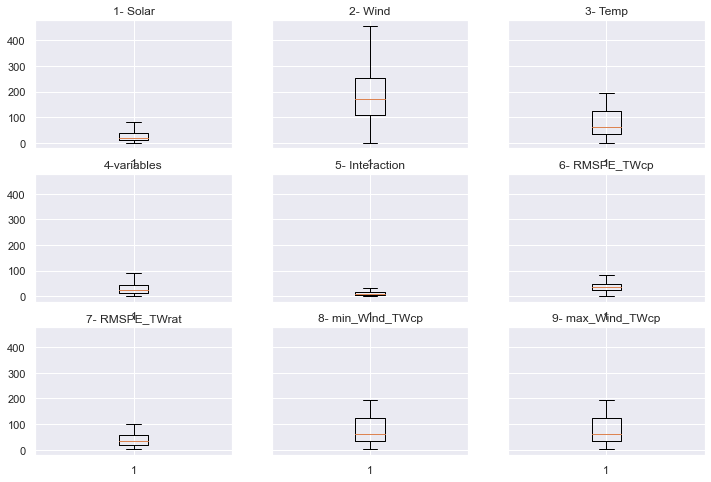

In [25]:
fig2, ax2 = plt.subplots(3,3, sharey= True, figsize=(12,8))

ax2[0,0].boxplot(RMSPE_Solar, sym= '')

ax2[0,1].boxplot(RMSPE_Wind, sym= '')

ax2[0,2].boxplot(RMSPE_Temp, sym= '')

ax2[1,0].boxplot(RMSPE_Solar_Wind_Temp, sym= '')

ax2[1,1].boxplot(RMSPE_inter, sym= '')

ax2[1,2].boxplot(RMSPE_TWcp, sym= '')

ax2[2,0].boxplot(RMSPE_TWrat, sym= '')

ax2[2,1].boxplot(RMSPE_min_Wind_TWcp, sym= '')

ax2[2,2].boxplot(RMSPE_max_Wind_TWcp, sym= '')

ax2[0,0].set_title('1- Solar')
ax2[0,1].set_title('2- Wind')
ax2[0,2].set_title('3- Temp')
ax2[1,0].set_title('4-variables')
ax2[1,1].set_title('5- Interaction')

ax2[1,2].set_title('6- RMSPE_TWcp')
ax2[2,0].set_title('7- RMSPE_TWrat')
ax2[2,1].set_title('8- min_Wind_TWcp')
ax2[2,2].set_title('9- max_Wind_TWcp')

plt.show()

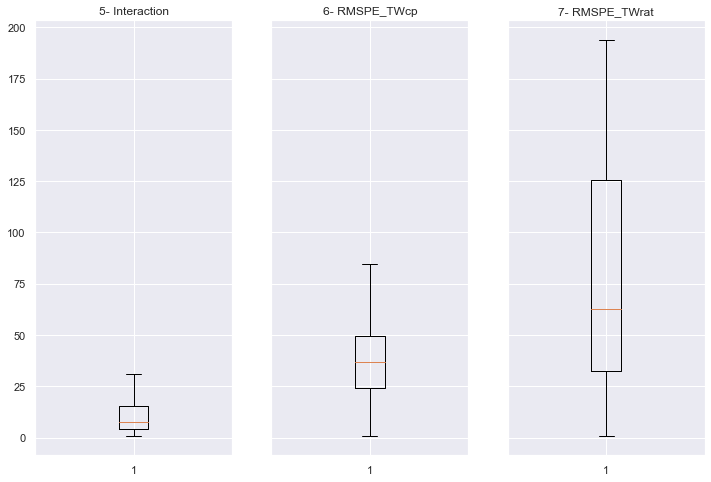

In [31]:
fig3, ax3 = plt.subplots(1,3 , sharey= True, figsize=(12,8))


ax3[0].boxplot(RMSPE_inter, sym= '')

ax3[1].boxplot(RMSPE_TWcp, sym= '')

ax3[2].boxplot(RMSPE_min_Wind_TWcp, sym= '')

ax3[0].set_title('5- Interaction')
ax3[1].set_title('6- RMSPE_TWcp')
ax3[2].set_title('7- RMSPE_TWrat')

plt.show()

### Assignment 4 - Part 4 - excercise 4

**b) According to the box plots charts, the Interaction model is the best.**

